# PATTERN MINING

In [266]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from mlxtend.frequent_patterns import fpgrowth

In [267]:
train = pd.read_csv('pp_train.csv')
test = pd.read_csv('pp_test.csv') 
#df = pd.concat([train, test], axis=0, ignore_index=True) #abbiamo unito train e test
df = train

In [268]:
#df.info()

In [269]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'numRegions', 'userReviewsTotal', 'is_Documentary',
       'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show',
       'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography', 'is_Musical',
       'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV',
       'is_News', 'is_Action', 'is_Crime', 'is_Short', 'is_Fantasy',
       'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama', 'is_Sport',
       'is_War', 'is_Horror', 'is_Animation', 'is_from_Oceania',
       'is_from_North America', 'is_from_South America', 'is_from_Asia',
       'is_from_Africa', 'is_from_Europe', 'countryOfOrigin',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS', 'countryOfOrigin_EU',

In [270]:
df = df[df["outlier_w_type"] != True]

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14955 entries, 0 to 16130
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                14955 non-null  object 
 1   rating                       14955 non-null  int64  
 2   startYear                    14955 non-null  int64  
 3   endYear                      14214 non-null  float64
 4   runtimeMinutes               10361 non-null  float64
 5   awardWins                    14955 non-null  float64
 6   numVotes                     14955 non-null  int64  
 7   totalImages                  14955 non-null  int64  
 8   totalVideos                  14955 non-null  int64  
 9   totalCredits                 14955 non-null  int64  
 10  criticReviewsTotal           14955 non-null  int64  
 11  titleType                    14955 non-null  object 
 12  awardNominationsExcludeWins  14955 non-null  int64  
 13  canHaveEpisodes      

## Gestione variabili 

### Osservare la distribuzione delle numeriche per binning

In [272]:
# df['startYear'].describe()
#df['totalNominations'].describe()
df['fill_runtimeMinutes_Bruno'].describe()
# df['totalMedia'].describe()
#df['numVotes'].describe()
# df['totalCredits'].describe()
# df['criticReviewsTotal'].describe()
#df['numRegions'].describe()
# df['userReviewsTotal'].describe()
# df['rating'].describe()

count    14955.000000
mean        54.833969
std         33.295746
min          1.000000
25%         26.000000
50%         48.000000
75%         88.000000
max        220.000000
Name: fill_runtimeMinutes_Bruno, dtype: float64

### Trasformazione binaria con valori semanticamente significativi
#### episodes

In [273]:
df["canHaveEpisodes"] = df["canHaveEpisodes"].astype(int)
canhaveeps_dict = {0: "cant_have_episodes", 1: "can_have_episodes"}
df["canHaveEpisodes"] = df["canHaveEpisodes"].map(canhaveeps_dict)
df["canHaveEpisodes"]

C:\Users\noemi\AppData\Local\Temp\ipykernel_17796\2497733362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["canHaveEpisodes"] = df["canHaveEpisodes"].astype(int)
C:\Users\noemi\AppData\Local\Temp\ipykernel_17796\2497733362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["canHaveEpisodes"] = df["canHaveEpisodes"].map(canhaveeps_dict)


0        cant_have_episodes
1        cant_have_episodes
2         can_have_episodes
4        cant_have_episodes
5        cant_have_episodes
                ...        
16125     can_have_episodes
16126    cant_have_episodes
16127    cant_have_episodes
16129    cant_have_episodes
16130    cant_have_episodes
Name: canHaveEpisodes, Length: 14955, dtype: object

### Handling of numerical attributes
Delle seguenti variabili: 'rating', 'startYear', 'numVotes', 'totalCredits', 'criticReviewsTotal', 'numRegions', 'userReviewsTotal',
    'countryOfOrigin_freq_enc',
       'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryOfOrigin_AS',
       'countryOfOrigin_EU', 'countryOfOrigin_OC', 'countryOfOrigin_SA',
       'countryOfOrigin_UNK'
       'fill_runtimeMinutes_Bruno', 'totalNominations',
       'totalMedia'

In [274]:
df_copy = df.copy()

##### TotalNominations

In [275]:
# df_copy["log_totalNominations"] = np.log1p(df["totalNominations"])

In [276]:
# #TOTALNOMINATIONS LOG-TRANSFORMED
# log_bins = [-0.01, 0, np.log(5), np.log(20), df_copy['log_totalNominations'].max()]
# labels = ['ZeroNom', 'LowNom', 'MediumNom', 'VeryHighNom']

# df_copy['log_nom_bin_cut'] = pd.cut(df_copy['log_totalNominations'], 
#                                 bins=log_bins, 
#                                 labels=labels)

# print(df_copy.groupby('log_nom_bin_cut')['totalNominations'].describe())

In [277]:
#TOTALNOMINATIONS NON LOG-TRANSFORMED   
bins = [-1, 0, 2, 10, df_copy['totalNominations'].max()]
labels = ['ZeroNom', 'LowNom', 'MediumNom', 'VeryHighNom']

df_copy['totalNominations_bin'] = pd.cut(df_copy['totalNominations'], 
                                bins=bins, 
                                labels=labels)

print(df_copy.groupby('totalNominations_bin')['totalNominations'].describe())

                        count       mean        std   min   25%   50%   75%  \
totalNominations_bin                                                          
ZeroNom               12521.0   0.000000   0.000000   0.0   0.0   0.0   0.0   
LowNom                 1372.0   1.333819   0.471748   1.0   1.0   1.0   2.0   
MediumNom               805.0   5.080745   2.041166   3.0   3.0   4.0   6.0   
VeryHighNom             257.0  27.988327  31.506136  11.0  13.0  17.0  28.0   

                        max  
totalNominations_bin         
ZeroNom                 0.0  
LowNom                  2.0  
MediumNom              10.0  
VeryHighNom           306.0  


##### TotalMedia

In [278]:
# df_copy["log_totalMedia"] = np.log1p(df["totalMedia"])

In [279]:
#TOTALMEDIA NON LOG-TRANSFORMED
bins = [-1, 0, 1, 8, 50, df_copy['totalMedia'].max()]
labels = ['ZeroMedia', 'LowMedia', 'MediumMedia', 'HighMedia', 'VeryHighMedia']
df_copy['media_bin'] = pd.cut(df_copy['totalMedia'], bins=bins, labels=labels)

print(df_copy.groupby('media_bin')['totalMedia'].describe())

                count        mean         std   min   25%   50%    75%     max
media_bin                                                                     
ZeroMedia      3066.0    0.000000    0.000000   0.0   0.0   0.0    0.0     0.0
LowMedia       4378.0    1.000000    0.000000   1.0   1.0   1.0    1.0     1.0
MediumMedia    4608.0    3.853733    1.918766   2.0   2.0   3.0    5.0     8.0
HighMedia      2292.0   19.359948   10.357639   9.0  11.0  16.0   25.0    50.0
VeryHighMedia   611.0  172.929624  339.162580  51.0  66.0  90.0  141.0  3516.0


In [280]:
# #TOTALMEDIA LOG-TRANSFORMED
# log_bins = [-1, 0, 1.61, 3.1, 4.0, np.log(df_copy['totalMedia'].max())]
# labels = ['ZeroMedia', 'LowMedia', 'MediumMedia', 'HighMedia', 'VeryHighMedia']
# df_copy['log_media_bin'] = pd.cut(df_copy['totalMedia'], bins=log_bins, labels=labels)

# print(df_copy.groupby('log_media_bin')['totalMedia'].describe())

##### fill_runtimeMinutes_Bruno - chiamato nel report runtimeMinutes_titletype

In [281]:
# df_copy["log_fill_runtimeMinutes_Bruno"] = np.log1p(df["fill_runtimeMinutes_Bruno"])

In [282]:
#FILL_RUNTIMEMINS_BRUNO NON LOG-TRANSFORMED
bins = [0, 30, 60, 90, df_copy['fill_runtimeMinutes_Bruno'].max()]
labels = ['VeryLowRuntime', 'LowRuntime', 'MediumRuntime', 'HighRuntime']

df_copy['runtime_bin'] = pd.cut(df_copy['fill_runtimeMinutes_Bruno'], bins=bins, labels=labels)
print(df_copy.groupby('runtime_bin')['fill_runtimeMinutes_Bruno'].describe())

                 count        mean        std   min   25%   50%    75%    max
runtime_bin                                                                  
VeryLowRuntime  5607.0   19.798823   9.151547   1.0  11.0  22.0   29.0   30.0
LowRuntime      3270.0   48.596330   7.265013  31.0  43.0  47.0   55.0   60.0
MediumRuntime   3426.0   81.906888   7.812311  61.0  77.0  85.0   89.0   90.0
HighRuntime     2652.0  101.624057  12.288163  91.0  94.0  98.0  105.0  220.0


In [283]:
# #FILL_RUNTIMEMINS_BRUNO LOG-TRANSFORMED
# bins = [-np.inf, 2.0, 3.5, 4.5, 5.5, np.inf]
# labels = ['VeryLowRuntime', 'LowRuntime', 'MediumRuntime', 'HighRuntime', 'VeryHighRuntime']

# df_copy['log_runtime_bin'] = pd.cut(
#     df_copy['log_fill_runtimeMinutes_Bruno'],
#     bins=bins,
#     labels=labels,
#     ordered=True)

# print(df_copy.groupby('log_runtime_bin')['fill_runtimeMinutes_Bruno'].describe())

##### rating

In [284]:
#RATING 
bins = [-1, 3, 6, 7, 8, df_copy['rating'].max()]
labels = ['VeryLowRating', 'LowRating', 'MediumRating', 'HighRating', "VeryHighRating"]
df_copy['rating_bin'] = pd.cut(df_copy['rating'], bins=bins, labels=labels)

print(df_copy['rating_bin'].value_counts())
print(df_copy.groupby('rating_bin')['rating'].describe())

rating_bin
HighRating        4378
MediumRating      4127
LowRating         4021
VeryHighRating    2224
VeryLowRating      205
Name: count, dtype: int64
                 count      mean       std  min  25%  50%  75%   max
rating_bin                                                          
VeryLowRating    205.0  2.682927  0.516351  1.0  2.0  3.0  3.0   3.0
LowRating       4021.0  5.521761  0.681187  4.0  5.0  6.0  6.0   6.0
MediumRating    4127.0  7.000000  0.000000  7.0  7.0  7.0  7.0   7.0
HighRating      4378.0  8.000000  0.000000  8.0  8.0  8.0  8.0   8.0
VeryHighRating  2224.0  9.142986  0.350137  9.0  9.0  9.0  9.0  10.0


##### numVotes   >>> max è sgravato

In [285]:
# df_copy["log_numVotes"] = np.log1p(df["numVotes"])

In [286]:
# #NUMVOTES LOG-TRANSFORMED
# bins = [-np.inf, 2.7, 3.9, 5.0, 8.0, np.inf]
# labels = ['VeryLowVotes', 'LowVotes', 'MediumVotes', 'HighVotes', 'VeryHighVotes']

# # Applicazione
# df_copy['log_numvotes_bin'] = pd.cut(
#     df_copy['log_numVotes'],
#     bins=bins,
#     labels=labels
# )

# print(df_copy.groupby('log_numvotes_bin')['numVotes'].describe())

In [287]:
#NUMVOTES NON LOG-TRANSFORMED
labels = ['VeryLowVotes', 'LowVotes', 'MediumVotes', 'HighVotes', 'VeryHighVotes']
bins = [4, 15, 50, 150, 1000, float('inf')]  # include il min=5 e max=1.071.372

df_copy['numVotes_bin'] = pd.cut(df['numVotes'], bins=bins, labels=labels, include_lowest=True)
print(df_copy.groupby('numVotes_bin')['numVotes'].describe())

                count          mean           std     min     25%     50%  \
numVotes_bin                                                                
VeryLowVotes   4049.0      9.990121      2.890868     5.0     8.0    10.0   
LowVotes       4477.0     28.241233      9.580983    16.0    20.0    26.0   
MediumVotes    2736.0     90.189693     27.724992    51.0    66.0    85.0   
HighVotes      2618.0    394.624905    221.316024   151.0   214.0   327.0   
VeryHighVotes  1075.0  14603.161860  54851.447378  1001.0  1511.5  2622.0   

                   75%       max  
numVotes_bin                      
VeryLowVotes     12.00      15.0  
LowVotes         35.00      50.0  
MediumVotes     111.00     150.0  
HighVotes       521.75     997.0  
VeryHighVotes  5629.00  803146.0  


##### StartYear

In [288]:
#STARTYEAR
bins =[
    1878,  # Cinema delle origini e muto
    1930,  # Cinema sonoro classico e radio
    1955,  # TV B/N e colore, cinema widescreen
    1980,  # Video domestico e media transazionali
    2000,  # DVD, internet e mobile
    2015,  # Streaming integrato e nuovi media
    df_copy['startYear'].max()] #era corrente
labels = ['pre-1930', '1930-1954', '1955-1979', '1980-1999', '2000-2019', 'post-2020']
df_copy['startYear_bin'] = pd.cut(df_copy['startYear'], bins=bins, labels=labels)

print(df_copy.groupby('startYear_bin')['startYear'].describe())

                count         mean        std     min     25%     50%     75%  \
startYear_bin                                                                   
pre-1930        459.0  1913.736383  11.594787  1891.0  1904.0  1913.0  1925.0   
1930-1954       951.0  1944.112513   7.463382  1931.0  1938.0  1944.0  1951.0   
1955-1979      2762.0  1969.340333   6.908679  1956.0  1964.0  1970.0  1975.0   
1980-1999      4047.0  1991.322708   5.401675  1981.0  1987.0  1992.0  1996.0   
2000-2019      3775.0  2008.991523   4.115185  2001.0  2006.0  2009.0  2012.0   
post-2020      2960.0  2019.500338   2.379648  2016.0  2017.0  2019.0  2021.0   

                  max  
startYear_bin          
pre-1930       1930.0  
1930-1954      1955.0  
1955-1979      1980.0  
1980-1999      1999.0  
2000-2019      2015.0  
post-2020      2024.0  


##### totalCredits

In [289]:
# df_copy["log_totalCredits"] = np.log1p(df["totalCredits"])

In [290]:
# #TOTALCREDITS LOG-TRANSFORMED
# bins = [-np.inf, 2.0, 3.0, 4.2, 6.0, np.inf]
# labels = ['VeryLowCredits', 'LowCredits', 'MediumCredits', 'HighCredits', 'VeryHighCredits']

# df_copy['log_totalCredits_bin'] = pd.cut(df_copy['log_totalCredits'], bins=bins, labels=labels)

In [291]:
# print(df_copy.groupby('log_totalCredits_bin')['totalCredits'].describe())

In [292]:
#TOTALCREDITS NON LOG-TRANSFORMED
# labels = ['VeryLowCredits', 'LowCredits', 'MediumCredits', 'HighCredits', 'VeryHighCredits']
# bins = [-1, 15, 35, 65, 200, float('inf')]

labels = ['VeryLowCredits', 'LowCredits', 'MediumCredits', 'HighCredits']
bins = [-1, 15, 35, 65, float('inf')]

df_copy['totalCredits_bin'] = pd.cut(df['totalCredits'], bins=bins, labels=labels, include_lowest=True)

In [293]:
print(df_copy.groupby('totalCredits_bin')['totalCredits'].describe())

                   count        mean         std   min   25%    50%    75%  \
totalCredits_bin                                                             
VeryLowCredits    3497.0    8.180440    4.345661   0.0   5.0    8.0   12.0   
LowCredits        4031.0   24.828330    5.718656  16.0  20.0   25.0   30.0   
MediumCredits     3659.0   48.495491    8.396748  36.0  41.0   48.0   55.0   
HighCredits       3768.0  163.411624  326.609445  66.0  81.0  108.0  165.0   

                      max  
totalCredits_bin           
VeryLowCredits       15.0  
LowCredits           35.0  
MediumCredits        65.0  
HighCredits       15742.0  


##### criticReviewsTotal

In [294]:
# df_copy["log_criticReviewsTotal"] = np.log1p(df["criticReviewsTotal"])

In [295]:
# #CRITICREVIEWS LOG-TRANSFORMED
# bins = [-0.01, 0.0, 1.4, 2.3, 3.4, 4.6, np.inf]
# labels = [
#     'NoCriticReviews',
#     'FewCriticReviews',
#     'ModerateCriticReviews',
#     'ManyCriticReviews',
#     'VeryHighCriticReviews',
#     'ExtensiveCriticReviews'
# ]

# df_copy['log_criticReviewsTotal_bin'] = pd.cut(
#     df_copy['log_criticReviewsTotal'],
#     bins=bins,
#     labels=labels
# )

In [296]:
# print(df_copy.groupby('log_criticReviewsTotal_bin')['criticReviewsTotal'].describe())

In [297]:
#CRITICREVIEWS NON LOG-TRANSFORMED
labels = [
    'NoCriticReviews',
    'FewCriticReviews',
    'ModerateCriticReviews',
    'ManyCriticReviews',
    'VeryHighCriticReviews',
    'ExtensiveCriticReviews'
]
bins = [-1, 0, 1, 5, 20, 45, float('inf')]

df_copy['criticReviewsTotal_bin'] = pd.cut(df['criticReviewsTotal'], bins=bins, labels=labels, include_lowest=True)
print(df_copy.groupby('criticReviewsTotal_bin')['criticReviewsTotal'].describe())

                          count       mean        std   min   25%   50%  \
criticReviewsTotal_bin                                                    
NoCriticReviews         10435.0   0.000000   0.000000   0.0   0.0   0.0   
FewCriticReviews         1730.0   1.000000   0.000000   1.0   1.0   1.0   
ModerateCriticReviews    1560.0   2.983333   1.070799   2.0   2.0   3.0   
ManyCriticReviews         841.0  10.172414   3.863135   6.0   7.0   9.0   
VeryHighCriticReviews     213.0  29.582160   6.739006  21.0  24.0  28.0   
ExtensiveCriticReviews    176.0  97.215909  63.665097  46.0  56.0  75.0   

                          75%    max  
criticReviewsTotal_bin                
NoCriticReviews           0.0    0.0  
FewCriticReviews          1.0    1.0  
ModerateCriticReviews     4.0    5.0  
ManyCriticReviews        13.0   20.0  
VeryHighCriticReviews    35.0   45.0  
ExtensiveCriticReviews  108.5  439.0  


##### numRegions

In [298]:
# df_copy["log_numRegions"] = np.log1p(df["numRegions"])

In [299]:
# #NUMREGIONS LOG-TRANSFORMED
# bins = [-np.inf, 1.2, 2.0, 3.2, np.inf]
# labels = ['VeryFewRegions', 'ModerateRegions', 'ManyRegions', 'GlobalRegions']

# # Applicazione
# df_copy['log_numRegions_bin'] = pd.cut(
#     df_copy['log_numRegions'],
#     bins=bins,
#     labels=labels
# )

In [300]:
# print(df_copy.groupby('log_numRegions_bin')['numRegions'].describe())

In [301]:
#NUMREGIONS NON LOG-TRANSFORMED
labels = ['FewRegions', 'ModerateRegions', 'ManyRegions']
bins = [0, 1, 8, float('inf')]

df_copy['numRegions_bin'] = pd.cut(df['numRegions'], bins=bins, labels=labels, include_lowest=True)
print(df_copy.groupby('numRegions_bin')['numRegions'].describe())


                  count       mean       std  min   25%   50%   75%   max
numRegions_bin                                                           
FewRegions       8829.0   1.000000  0.000000  1.0   1.0   1.0   1.0   1.0
ModerateRegions  4748.0   3.974726  1.978554  2.0   2.0   3.0   6.0   8.0
ManyRegions      1378.0  17.775036  9.186373  9.0  11.0  15.0  22.0  62.0


##### userReviewsTotal

In [302]:
# df_copy["log_userReviewsTotal"] = np.log1p(df["userReviewsTotal"])

In [303]:
# #USERREVIEWSTOTAL LOG-TRANSFORMED
# bins = [-0.01, 0.0, 2.8, 5.0, np.inf]
# labels = ['NoUserReviews', 'FewUserReviews', 'ManyUserReviews', 'VeryManyUserReviews']

# # Applicazione
# df_copy['log_userReviewsTotal_bin'] = pd.cut(
#     df_copy['log_userReviewsTotal'],
#     bins=bins,
#     labels=labels)

In [304]:
# print(df_copy.groupby('log_userReviewsTotal_bin')['userReviewsTotal'].describe())

In [305]:
#USERREVIEWSTOTAL NON LOG-TRANSFORMED
labels = ['NoUserReviews', 'FewUserReviews', 'ManyUserReviews', 'VeryManyUserReviews']
bins = [-1, 0, 3, 30, float('inf')]

df_copy['userReviewsTotal_bin'] = pd.cut(df['userReviewsTotal'], bins=bins, labels=labels, include_lowest=True)

In [306]:
print(df_copy.groupby('userReviewsTotal_bin')['userReviewsTotal'].describe())

                       count        mean         std   min    25%   50%  \
userReviewsTotal_bin                                                      
NoUserReviews         8454.0    0.000000    0.000000   0.0   0.00   0.0   
FewUserReviews        3875.0    1.566452    0.739343   1.0   1.00   1.0   
ManyUserReviews       2162.0   10.129972    6.613494   4.0   5.00   8.0   
VeryManyUserReviews    464.0  145.540948  324.193737  31.0  41.75  63.0   

                         75%     max  
userReviewsTotal_bin                  
NoUserReviews           0.00     0.0  
FewUserReviews          2.00     3.0  
ManyUserReviews        13.00    30.0  
VeryManyUserReviews   129.25  5727.0  


##### countryOfOrigin_freqenc

In [307]:
df_copy["countryOfOrigin_freq_enc"].describe()

count    14955.000000
mean         0.196614
std          0.182731
min          0.000056
25%          0.018089
50%          0.098792
75%          0.397061
max          0.658429
Name: countryOfOrigin_freq_enc, dtype: float64

In [308]:
bins = [-0.01, 0.03, 0.3, 1.0]
labels = ['LowFreqCountries', 'MediumFreqCountries', 'HighFreqCountries']

df_copy["country_freq_bin"] = pd.cut(
    df_copy["countryOfOrigin_freq_enc"],
    bins=bins,
    labels=labels
)

In [309]:
print(df_copy.groupby('country_freq_bin')['countryOfOrigin_freq_enc'].describe())

                      count      mean       std       min       25%       50%  \
country_freq_bin                                                                
LowFreqCountries     4559.0  0.011128  0.007641  0.000056  0.005510  0.009406   
MediumFreqCountries  3816.0  0.067012  0.029802  0.030556  0.045973  0.047086   
HighFreqCountries    6580.0  0.400291  0.016326  0.397061  0.397061  0.397061   

                          75%       max  
country_freq_bin                         
LowFreqCountries     0.017532  0.029888  
MediumFreqCountries  0.098792  0.204931  
HighFreqCountries    0.397061  0.658429  


### Handling of categorical attributes

##### countryOfOrigin

In [310]:
# # BINARIZZAZIONE -  ONE HOT ENCODING 
# df_copy['from_Europe_bin'] = (df_copy['countryOfOrigin_EU'] > 0).astype(int)
# df_copy['from_NorthAmerica_bin'] = (df_copy['countryOfOrigin_NA'] > 0).astype(int)
# df_copy['from_SouthAmerica_bin'] = (df_copy['countryOfOrigin_SA'] > 0).astype(int)
# df_copy['from_Asia_bin'] = (df_copy['countryOfOrigin_SA'] > 0).astype(int)
# df_copy['from_Oceania_bin'] = (df_copy['countryOfOrigin_OC'] > 0).astype(int)
# df_copy['from_Africa_bin'] = (df_copy['countryOfOrigin_AF'] > 0).astype(int)
# df_copy['from_Unknown_bin'] = (df_copy['countryOfOrigin_UNK'] > 0).astype(int)


In [311]:
# BINARIZZAZIONE 
def discretize_continent_count(df, col_name, cont):
    new_col = f'{cont }_bin'
    
    def label(value):
        if value == 0:
            return f'not_{cont}'
       # elif value == 1:
        #    return f'one_{cont}'
        else:
            return f'is_{cont}'
    
    df[new_col] = df[col_name].apply(label)

# applico funzione
discretize_continent_count(df_copy, "countryOfOrigin_NA", "from_NorthAmerica")
discretize_continent_count(df_copy, "countryOfOrigin_EU", "from_Europe")
discretize_continent_count(df_copy, "countryOfOrigin_SA", "from_SouthAmerica")
discretize_continent_count(df_copy, "countryOfOrigin_AS", "from_Asia")
discretize_continent_count(df_copy, "countryOfOrigin_OC", "from_Oceania")
discretize_continent_count(df_copy, "countryOfOrigin_AF", "from_Africa")
discretize_continent_count(df_copy, "countryOfOrigin_UNK", "from_Unknown")

#### generi

In [312]:
# BINARIZZAZIONE 
def genre_column(df, col_name, genre):
    new_col = f'{genre}_bin'
    
    def label(value):
        if value == 0:
            return f'not_{genre}_genre'
       # elif value == 1:
        #    return f'one_{genre}'
        else:
            return f'is_{genre}_genre'
    
    df[new_col] = df[col_name].apply(label)

# applico funzione
genre_column(df_copy, "is_Documentary", "documentary")
genre_column(df_copy, "is_History", "history")
genre_column(df_copy, "is_Adventure", "adventure")
genre_column(df_copy, "is_Thriller", "thriller")
genre_column(df_copy, "is_Game-Show", "game-show")
genre_column(df_copy, "is_Comedy", "comedy")
genre_column(df_copy, "is_Sci-Fi", "sci-fi")
genre_column(df_copy, "is_Romance", "romance")
genre_column(df_copy, "is_Biography", "biography")
genre_column(df_copy, "is_Musical", "musical")
genre_column(df_copy, "is_Western", "western")
genre_column(df_copy, "is_Music", "music")
genre_column(df_copy, "is_Film-Noir", "film-noir")
genre_column(df_copy, "is_Adult", "adult")
genre_column(df_copy, "is_Reality-TV", "reality-tv")
genre_column(df_copy, "is_News", "news")
genre_column(df_copy, "is_Action", "action")
genre_column(df_copy, "is_Crime", "crime")
genre_column(df_copy, "is_Short", "short")
genre_column(df_copy, "is_Fantasy", "fantasy")
genre_column(df_copy, "is_Family", "family")
genre_column(df_copy, "is_Mystery", "mystery")
genre_column(df_copy, "is_Talk-Show", "talk-show")
genre_column(df_copy, "is_Drama", "drama")
genre_column(df_copy, "is_Sport", "sport")
genre_column(df_copy, "is_War", "war")
genre_column(df_copy, "is_Horror", "horror")
genre_column(df_copy, "is_Animation", "animation")


In [313]:
df_copy.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,short_bin,fantasy_bin,family_bin,mystery_bin,talk-show_bin,drama_bin,sport_bin,war_bin,horror_bin,animation_bin
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,1995.0,NaN,0.0,779,1,0,21,...,not_short_genre,not_fantasy_genre,not_family_genre,not_mystery_genre,not_talk-show_genre,not_drama_genre,not_sport_genre,not_war_genre,not_horror_genre,is_animation_genre
1,Idealnaya para,6,1992,1992.0,NaN,0.0,38,1,0,24,...,not_short_genre,not_fantasy_genre,not_family_genre,not_mystery_genre,not_talk-show_genre,not_drama_genre,not_sport_genre,not_war_genre,not_horror_genre,not_animation_genre
2,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,22,0,56,...,not_short_genre,not_fantasy_genre,not_family_genre,not_mystery_genre,not_talk-show_genre,not_drama_genre,not_sport_genre,not_war_genre,not_horror_genre,not_animation_genre
4,Lightdance,9,1995,1995.0,34.0,0.0,14,1,0,0,...,is_short_genre,not_fantasy_genre,not_family_genre,not_mystery_genre,not_talk-show_genre,not_drama_genre,not_sport_genre,not_war_genre,not_horror_genre,not_animation_genre
5,"Kiss, Kiss Bang, Bang",8,1995,1995.0,45.0,0.0,96,5,0,110,...,not_short_genre,not_fantasy_genre,not_family_genre,not_mystery_genre,not_talk-show_genre,is_drama_genre,not_sport_genre,not_war_genre,not_horror_genre,not_animation_genre


## Pattern Mining

### Transactions Creation

In [314]:
df_copy.columns[80:111]

Index(['from_Oceania_bin', 'from_Africa_bin', 'from_Unknown_bin',
       'documentary_bin', 'history_bin', 'adventure_bin', 'thriller_bin',
       'game-show_bin', 'comedy_bin', 'sci-fi_bin', 'romance_bin',
       'biography_bin', 'musical_bin', 'western_bin', 'music_bin',
       'film-noir_bin', 'adult_bin', 'reality-tv_bin', 'news_bin',
       'action_bin', 'crime_bin', 'short_bin', 'fantasy_bin', 'family_bin',
       'mystery_bin', 'talk-show_bin', 'drama_bin', 'sport_bin', 'war_bin',
       'horror_bin', 'animation_bin'],
      dtype='object')

In [315]:
cols = [
        "rating_bin", 
        "runtime_bin", 
        "totalCredits_bin", 
        "titleType",
        'from_NorthAmerica_bin','from_Europe_bin' , 'from_SouthAmerica_bin', 
        'from_Asia_bin', 'from_Oceania_bin', 'from_Africa_bin', 
        'from_Unknown_bin'
]


# cols = [
#         #"canHaveEpisodes", 
#         #"totalNominations_bin", 
#         #"media_bin",
#         "rating_bin", # appena aggiunto
#         "runtime_bin", 
#        ### "numVotes_bin", 
#         #"startYear_bin", # appena aggiunto
#         "totalCredits_bin", 
#         #"criticReviewsTotal_bin",  # alza il support in generale ma ce n'è tante con NO quindi forse non va bene
#         # "country_freq_bin",
#         #"numRegions_bin",  # trova + regole per NA ma non so se senso
#         ####"userReviewsTotal_bin", # appena tolta provaaaa
#         "titleType",
#         'from_NorthAmerica_bin',
#         'from_Europe_bin' , 
#          'from_SouthAmerica_bin', 'from_Asia_bin', 'from_Oceania_bin', 'from_Africa_bin', 
#         'from_Unknown_bin'
#   # GENERI
#       #   'documentary_bin', 'history_bin', 'adventure_bin', 'thriller_bin', 'comedy_bin', 'sci-fi_bin', 'romance_bin', 'action_bin', 'crime_bin',  'fantasy_bin', 'reality-tv_bin' , 'horror_bin', 'animation_bin' 'biography_bin', 'musical_bin', 'western_bin', 'music_bin',
#      #  'film-noir_bin', 'adult_bin', 'talk-show_bin', 'news_bin',
#             #'game-show_bin', 
#        #'short_bin',
#           # 'family_bin',
#        #'mystery_bin',
#         # 'drama_bin', 'sport_bin', 'war_bin',
      
# ]





In [316]:
transactions = []

for index, row in df_copy[cols].iterrows():
    transaction = []
    for col in cols:
        value = str(row[col])
        if not value.startswith('not_'):  # Ignora 'none_from_*'
            transaction.append(value)
    transactions.append(transaction)

# Verifica risultato
print(len(transactions))
print(transactions[10:15])


14955
[['VeryLowRating', 'MediumRuntime', 'HighCredits', 'movie', 'is_from_NorthAmerica'], ['MediumRating', 'MediumRuntime', 'HighCredits', 'movie', 'is_from_Europe'], ['VeryHighRating', 'VeryLowRuntime', 'HighCredits', 'tvEpisode', 'is_from_NorthAmerica'], ['VeryHighRating', 'LowRuntime', 'LowCredits', 'tvEpisode', 'is_from_Asia'], ['MediumRating', 'VeryLowRuntime', 'VeryLowCredits', 'short', 'is_from_Europe']]


In [317]:
# Let's utilize TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_apriori = pd.DataFrame(te_array, columns=te.columns_)

# Visualizza le prime righe per assicurarti che la trasformazione sia corretta
print(df_apriori.head())

   HighCredits  HighRating  HighRuntime  LowCredits  LowRating  LowRuntime  \
0        False        True        False        True      False       False   
1        False       False         True        True       True       False   
2        False       False        False       False       True       False   
3        False       False        False       False      False        True   
4         True        True        False       False      False        True   

   MediumCredits  MediumRating  MediumRuntime  VeryHighRating  ...  \
0          False         False          False           False  ...   
1          False         False          False           False  ...   
2           True         False          False           False  ...   
3          False         False          False            True  ...   
4          False         False          False           False  ...   

   is_from_SouthAmerica  is_from_Unknown  movie  short  tvEpisode  \
0                 False            False 

### Confronto itemset per support

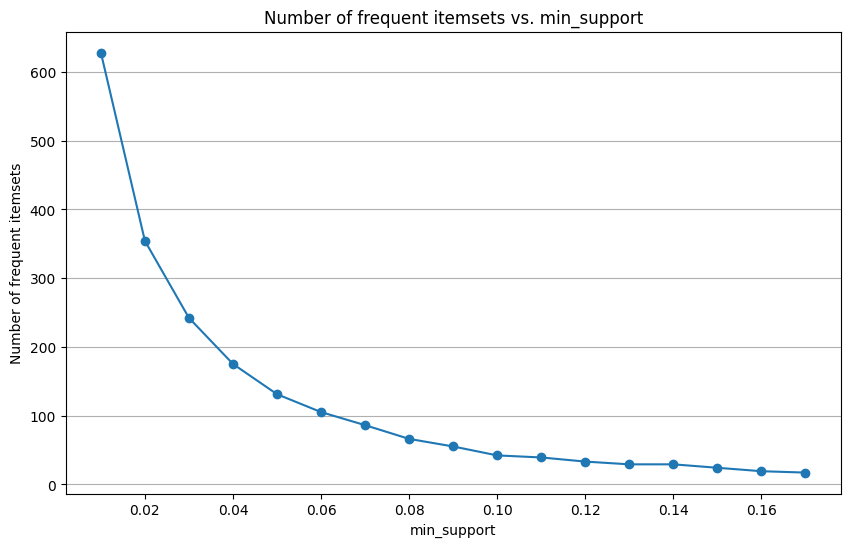

In [339]:
# Genera una lista di min_sup da testare
min_sups = [round(x, 2) for x in list(np.arange(0.01, 0.18, 0.01))]

# Lista per salvare il numero di itemset per ciascun supporto
num_itemsets = []

# Calcolo degli itemset frequenti per ogni min_sup
for min_sup in min_sups:
    frequent_itemsets = apriori(df_apriori, min_support=min_sup, use_colnames=True)
    num_itemsets.append(len(frequent_itemsets))

# Plot
plt.figure(figsize=(10,6))
plt.plot(min_sups, num_itemsets, marker='o')
plt.title('Number of frequent itemsets vs. min_support')
plt.xlabel('min_support')
plt.ylabel('Number of frequent itemsets')
plt.grid(axis='y')
plt.show()


In [319]:
# <!-- The plot above shows how the number of frequent itemsets changes as you increase the minimum support (`min_support`) threshold in the Apriori algorithm.

# **How to interpret the plot:**
# - **X-axis:** Minimum support threshold (from 0.01 to 0.29).
# - **Y-axis:** Number of frequent itemsets found at each support value.
# - As `min_support` increases, the number of frequent itemsets decreases. This is expected: higher support means fewer itemsets meet the threshold.

# **How to choose the best support:**
# - **Too low support:** You get too many itemsets, many of which may be uninteresting or spurious.
# - **Too high support:** You get very few itemsets, possibly missing interesting patterns.
# - **Best practice:** Choose a support where the curve starts to flatten out (the "elbow" point), balancing between too many and too few itemsets.

# **In your case:**
# - The curve drops quickly at first, then flattens around `min_support ≈ 0.07`–`0.10`.
# - At `min_support = 0.07`, you have 202 itemsets (see your variable `num_itemsets`).
# - This is a reasonable trade-off: enough itemsets for analysis, but not so many as to be overwhelming.

# **Recommendation:**  
# Set `min_support` between **0.07 and 0.10** for your further analysis. This will give you a manageable number of meaningful patterns. -->

In [320]:
# # Print the top 3 itemsets for each support in fine_min_sups
# for min_sup in fine_min_sups:
#     frequent_itemsets = apriori(df_apriori, min_support=min_sup, use_colnames=True)
#     print(f"\nTop 3 itemsets for min_support={min_sup:.3f}:")
#     display(frequent_itemsets.sort_values(by="support", ascending=False).head(3))

# # Plot the average support of itemsets at each threshold
# avg_supports = []
# for min_sup in fine_min_sups:
#     frequent_itemsets = apriori(df_apriori, min_support=min_sup, use_colnames=True)
#     avg_supports.append(frequent_itemsets['support'].mean())

# plt.figure(figsize=(8, 5))
# plt.plot(fine_min_sups, avg_supports, marker='o')
# plt.title('Average Support of Frequent Itemsets vs. min_support')
# plt.xlabel('min_support')
# plt.ylabel('Average support of itemsets')
# plt.grid(True)
# plt.show()

### Apriori - frequent pattern analysis

In [321]:
min_support = 0.08  # % supporto minimo  0.11 con numregions
min_confidence = 0.55  # 60% confidenza minima --> serve dopo nella fase di rules extraction

# Apriori
frequent_itemsets_apriori = apriori(df_apriori, min_support=min_support, use_colnames=True)

# FRA -< Filtra gli itemset con almeno 2 item (lunghezza >= 2)
    #frequent_itemsets_apriori = frequent_itemsets_apriori[frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x) >= 2)]
    #frequent_itemsets_apriori.reset_index(drop=True, inplace=True)

print(frequent_itemsets_apriori.info())
print(frequent_itemsets_apriori.head(51))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   66 non-null     float64
 1   itemsets  66 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.2+ KB
None
     support                               itemsets
0   0.251956                          (HighCredits)
1   0.292745                           (HighRating)
2   0.177332                          (HighRuntime)
3   0.269542                           (LowCredits)
4   0.268873                            (LowRating)
5   0.218656                           (LowRuntime)
6   0.244667                        (MediumCredits)
7   0.275961                         (MediumRating)
8   0.229087                        (MediumRuntime)
9   0.148713                       (VeryHighRating)
10  0.233835                       (VeryLowCredits)
11  0.374925                       (VeryLowRuntime)
12  0.142

In [322]:
frequent_patterns_sorted = frequent_itemsets_apriori.sort_values(by='support', ascending=False)
print(frequent_patterns_sorted)

     support                                       itemsets
14  0.485323                         (is_from_NorthAmerica)
11  0.374925                               (VeryLowRuntime)
15  0.318556                                        (movie)
13  0.317085                               (is_from_Europe)
17  0.303310                                    (tvEpisode)
..       ...                                            ...
19  0.083517                      (HighRating, HighCredits)
59  0.082247                  (short, is_from_NorthAmerica)
64  0.081846  (short, VeryLowRuntime, is_from_NorthAmerica)
22  0.081110                           (movie, HighCredits)
50  0.080843               (VeryLowCredits, is_from_Europe)

[66 rows x 2 columns]


In [323]:
# Extract itemsets with highest support for size 2, 3, and 4
result = {}

for k in [1, 2, 3]:
    # Filter itemsets of length k
    itemsets_k = frequent_itemsets_apriori[frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x) == k)]
    if not itemsets_k.empty:
        max_support = itemsets_k['support'].max()
        top_itemsets = itemsets_k[itemsets_k['support'] == max_support]
        result[k] = top_itemsets
        print(f"\nTop itemsets of size {k} (support={max_support}):")
        print(top_itemsets)
    else:
        print(f"\nNo itemsets of size {k} found.")


Top itemsets of size 1 (support=0.4853226345703778):
     support                itemsets
14  0.485323  (is_from_NorthAmerica)

Top itemsets of size 2 (support=0.20421263791374122):
     support                                itemsets
54  0.204213  (VeryLowRuntime, is_from_NorthAmerica)

Top itemsets of size 3 (support=0.09354730859244399):
     support                                           itemsets
65  0.093547  (tvEpisode, VeryLowRuntime, is_from_NorthAmerica)


### maximal itemset

In [324]:
# Find maximal itemsets (those that are not subsets of any other itemsets)
maximal_itemsets_apriori = frequent_itemsets_apriori[frequent_itemsets_apriori['itemsets'].apply(lambda x: not any(x < y for y in frequent_itemsets_apriori['itemsets']))]

# Display the results
print(maximal_itemsets_apriori.info())
print(maximal_itemsets_apriori.head(15))

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 9 to 65
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   39 non-null     float64
 1   itemsets  39 non-null     object 
dtypes: float64(1), object(1)
memory usage: 936.0+ bytes
None
     support                             itemsets
9   0.148713                     (VeryHighRating)
12  0.142561                       (is_from_Asia)
18  0.087997                           (tvSeries)
19  0.083517            (HighRating, HighCredits)
20  0.083718            (HighCredits, LowRuntime)
21  0.158007  (is_from_NorthAmerica, HighCredits)
22  0.081110                 (movie, HighCredits)
23  0.105650             (tvEpisode, HighCredits)
24  0.093949             (HighRating, LowRuntime)
25  0.124908         (HighRating, VeryLowRuntime)
26  0.088399         (HighRating, is_from_Europe)
29  0.153594                 (movie, HighRuntime)
30  0.100033         (VeryLowRuntim

### Association Rules

In [325]:
#Apriori
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=min_confidence)
rules_apriori.info()
rules_apriori.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         18 non-null     object 
 1   consequents         18 non-null     object 
 2   antecedent support  18 non-null     float64
 3   consequent support  18 non-null     float64
 4   support             18 non-null     float64
 5   confidence          18 non-null     float64
 6   lift                18 non-null     float64
 7   representativity    18 non-null     float64
 8   leverage            18 non-null     float64
 9   conviction          18 non-null     float64
 10  zhangs_metric       18 non-null     float64
 11  jaccard             18 non-null     float64
 12  certainty           18 non-null     float64
 13  kulczynski          18 non-null     float64
dtypes: float64(12), object(2)
memory usage: 2.1+ KB


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(HighCredits),(is_from_NorthAmerica),0.251956,0.485323,0.158007,0.627123,1.292178,1.0,0.035727,1.380288,0.302272,0.272769,0.275513,0.476347
1,(HighRuntime),(movie),0.177332,0.318556,0.153594,0.866139,2.718956,1.0,0.097104,5.090677,0.768490,0.448720,0.803562,0.674148
2,(LowRuntime),(is_from_NorthAmerica),0.218656,0.485323,0.120829,0.552599,1.138623,1.0,0.014710,1.150373,0.155816,0.207201,0.130716,0.400783
3,(LowRuntime),(tvEpisode),0.218656,0.303310,0.143765,0.657492,2.167724,1.0,0.077444,2.034086,0.689436,0.380127,0.508379,0.565739
4,(MediumRuntime),(movie),0.229087,0.318556,0.164962,0.720082,2.260458,1.0,0.091985,2.434440,0.723314,0.431068,0.589228,0.618962
5,(short),(VeryLowCredits),0.160013,0.233835,0.093949,0.587129,2.510871,1.0,0.056532,1.855702,0.716359,0.313266,0.461120,0.494451
6,(short),(VeryLowRuntime),0.160013,0.374925,0.158877,0.992896,2.648254,1.0,0.098884,87.988530,0.740955,0.422475,0.988635,0.708326
7,(tvEpisode),(is_from_NorthAmerica),0.303310,0.485323,0.185690,0.612213,1.261457,1.0,0.038487,1.327218,0.297500,0.307974,0.246544,0.497413
8,"(HighRating, tvEpisode)",(is_from_NorthAmerica),0.143765,0.485323,0.091876,0.639070,1.316794,1.0,0.022103,1.425975,0.280974,0.171023,0.298725,0.414189
9,"(HighRating, is_from_NorthAmerica)",(tvEpisode),0.152524,0.303310,0.091876,0.602367,1.985980,1.0,0.045614,1.752095,0.585822,0.252434,0.429255,0.452639


### Scelta valori confidence

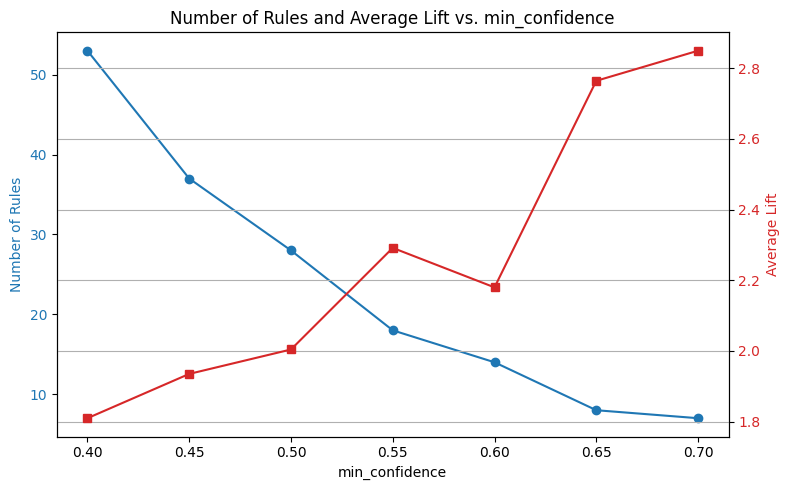

In [338]:
# Collect number of rules and average lift for each confidence value
from mlxtend.frequent_patterns import association_rules
# conf_values = [0.4, 0.5, 0.6, 0.7]
# for c in conf_values:
#     rules = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=c)
#     print(f"min_confidence={c}: {len(rules)} regole trovate, lift medio = {rules['lift'].mean():.2f}")


conf_values = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
#conf_values = [0.4, 0.5, 0.6, 0.7]
num_rules = []
avg_lifts = []

for c in conf_values:
    rules = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=c)
    num_rules.append(len(rules))
    avg_lifts.append(rules['lift'].mean())

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.set_xlabel('min_confidence')
ax1.set_ylabel('Number of Rules', color=color)
ax1.plot(conf_values, num_rules, marker='o', color=color, label='Number of Rules')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(conf_values)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Lift', color=color)
ax2.plot(conf_values, avg_lifts, marker='s', color=color, label='Average Lift')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Number of Rules and Average Lift vs. min_confidence')
fig.tight_layout()
plt.grid(True)
plt.show() 

In [327]:
# You can extract several insights from the plot in `fig` (Number of Rules and Average Lift vs. min_confidence):

# - **Number of Rules**: Shows how the number of association rules found changes as you increase the minimum confidence threshold. Typically, as confidence increases, the number of rules decreases.
# - **Average Lift**: Indicates the average strength of the rules (how much more likely the consequent is given the antecedent, compared to random chance) for each confidence threshold.
# - **Trade-off Visualization**: The plot helps you choose a good confidence threshold by balancing the number of rules (coverage) and their average lift (quality).
# - **Optimal Confidence**: You can visually select a confidence value where the number of rules is reasonable and the average lift is high, optimizing both interpretability and rule strength.

# This plot is useful for tuning your association rule mining parameters.

In [328]:
rules_apriori.sort_values(by="lift", axis=0, ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
15,(short),"(VeryLowCredits, VeryLowRuntime)",0.160013,0.127716,0.093347,0.583368,4.567681,1.0,0.072910,2.093655,0.929861,0.480220,0.522366,0.657129
12,"(VeryLowCredits, VeryLowRuntime)",(short),0.127716,0.160013,0.093347,0.730890,4.567681,1.0,0.072910,3.121351,0.895432,0.480220,0.679626,0.657129
1,(HighRuntime),(movie),0.177332,0.318556,0.153594,0.866139,2.718956,1.0,0.097104,5.090677,0.768490,0.448720,0.803562,0.674148
16,"(is_from_NorthAmerica, short)",(VeryLowRuntime),0.082247,0.374925,0.081846,0.995122,2.654191,1.0,0.051009,128.140421,0.679090,0.218065,0.992196,0.606710
13,"(VeryLowCredits, short)",(VeryLowRuntime),0.093949,0.374925,0.093347,0.993594,2.650116,1.0,0.058123,97.581188,0.687222,0.248575,0.989752,0.621284
6,(short),(VeryLowRuntime),0.160013,0.374925,0.158877,0.992896,2.648254,1.0,0.098884,87.988530,0.740955,0.422475,0.988635,0.708326
14,"(VeryLowRuntime, short)",(VeryLowCredits),0.158877,0.233835,0.093347,0.587542,2.512637,1.0,0.056196,1.857560,0.715724,0.311816,0.461659,0.493371
5,(short),(VeryLowCredits),0.160013,0.233835,0.093949,0.587129,2.510871,1.0,0.056532,1.855702,0.716359,0.313266,0.461120,0.494451
11,"(is_from_NorthAmerica, LowRuntime)",(tvEpisode),0.120829,0.303310,0.089669,0.742114,2.446718,1.0,0.053020,2.701543,0.672553,0.268093,0.629841,0.518874
4,(MediumRuntime),(movie),0.229087,0.318556,0.164962,0.720082,2.260458,1.0,0.091985,2.434440,0.723314,0.431068,0.589228,0.618962


### Target Prediction: various attempts (find the most informative one)

In [329]:
# Filtro le regole con "nord america" nei consequents
rules_north_am = rules_apriori[rules_apriori['consequents'] == frozenset({'is_from_NorthAmerica'})]


# Ordina le regole per lift in ordine decrescente
rules_north_am_sorted = rules_north_am.sort_values(by='lift', ascending=False)

print(rules_north_am_sorted)

                    antecedents             consequents  antecedent support  \
8       (HighRating, tvEpisode)  (is_from_NorthAmerica)            0.143765   
0                 (HighCredits)  (is_from_NorthAmerica)            0.251956   
10      (tvEpisode, LowRuntime)  (is_from_NorthAmerica)            0.143765   
7                   (tvEpisode)  (is_from_NorthAmerica)            0.303310   
17  (tvEpisode, VeryLowRuntime)  (is_from_NorthAmerica)            0.153059   
2                  (LowRuntime)  (is_from_NorthAmerica)            0.218656   

    consequent support   support  confidence      lift  representativity  \
8             0.485323  0.091876    0.639070  1.316794               1.0   
0             0.485323  0.158007    0.627123  1.292178               1.0   
10            0.485323  0.089669    0.623721  1.285168               1.0   
7             0.485323  0.185690    0.612213  1.261457               1.0   
17            0.485323  0.093547    0.611184  1.259335            

In [330]:
# Filtro le regole con "low runtime" nei consequents
rules_north_am = rules_apriori[rules_apriori['consequents'] == frozenset({'VeryLowCredits'})]

# Ordina le regole per lift in ordine decrescente
rules_north_am_sorted = rules_north_am.sort_values(by='lift', ascending=False)

print(rules_north_am_sorted)

                antecedents       consequents  antecedent support  \
14  (VeryLowRuntime, short)  (VeryLowCredits)            0.158877   
5                   (short)  (VeryLowCredits)            0.160013   

    consequent support   support  confidence      lift  representativity  \
14            0.233835  0.093347    0.587542  2.512637               1.0   
5             0.233835  0.093949    0.587129  2.510871               1.0   

    leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
14  0.056196    1.857560       0.715724  0.311816   0.461659    0.493371  
5   0.056532    1.855702       0.716359  0.313266   0.461120    0.494451  


In [331]:
# Filtro le regole con "low runtime" nei consequents
rules_north_am = rules_apriori[rules_apriori['consequents'] == frozenset({'tvEpisode'})]

# Ordina le regole per lift in ordine decrescente
rules_north_am_sorted = rules_north_am.sort_values(by='lift', ascending=False)

print(rules_north_am_sorted)

                           antecedents  consequents  antecedent support  \
11  (is_from_NorthAmerica, LowRuntime)  (tvEpisode)            0.120829   
3                         (LowRuntime)  (tvEpisode)            0.218656   
9   (HighRating, is_from_NorthAmerica)  (tvEpisode)            0.152524   

    consequent support   support  confidence      lift  representativity  \
11             0.30331  0.089669    0.742114  2.446718               1.0   
3              0.30331  0.143765    0.657492  2.167724               1.0   
9              0.30331  0.091876    0.602367  1.985980               1.0   

    leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
11  0.053020    2.701543       0.672553  0.268093   0.629841    0.518874  
3   0.077444    2.034086       0.689436  0.380127   0.508379    0.565739  
9   0.045614    1.752095       0.585822  0.252434   0.429255    0.452639  
